In [7]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt

%matplotlib inline

In [14]:
net = torch.nn.Sequential(
    torch.nn.Linear(2, 10),
    torch.nn.ReLU(), # 与F中的relu不同的是，这里的ReLU是一个类
    torch.nn.Linear(10, 2),
)
print(net)

Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=2, bias=True)
)


In [15]:
n_data = torch.ones(100, 2)
x0 = torch.tensor(torch.normal(2 * n_data, 1), dtype=torch.float32)
y0 = torch.tensor(torch.zeros(100), dtype=torch.int64)
x1 = torch.tensor(torch.normal(-2 * n_data, 1), dtype=torch.float32)
y1 = torch.tensor(torch.ones(100), dtype=torch.int64)

x = torch.cat((x0, x1), 0)
y = torch.cat((y0, y1), )

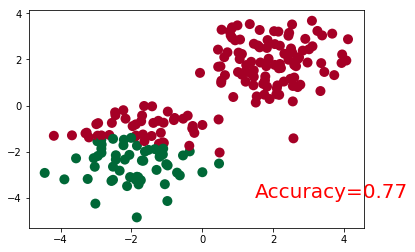

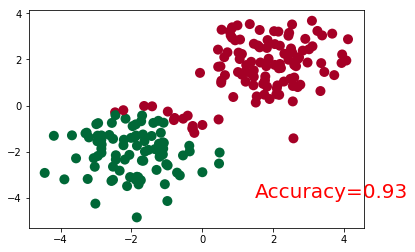

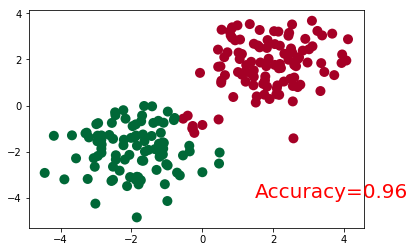

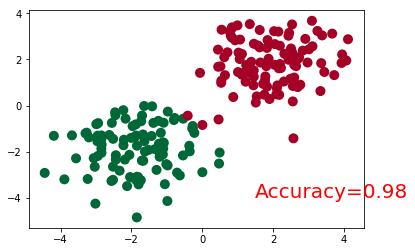

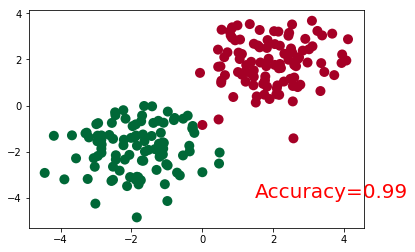

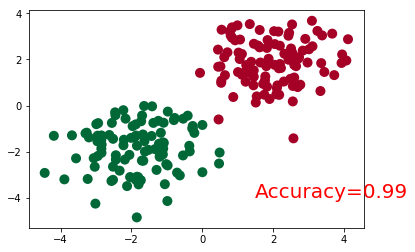

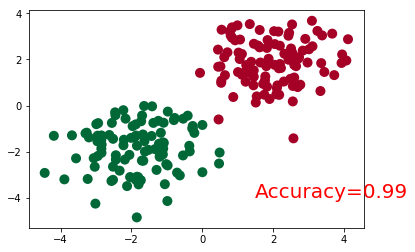

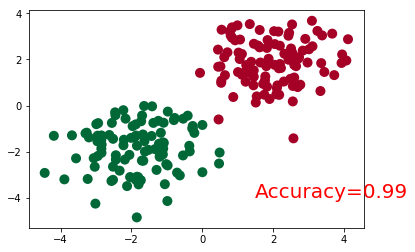

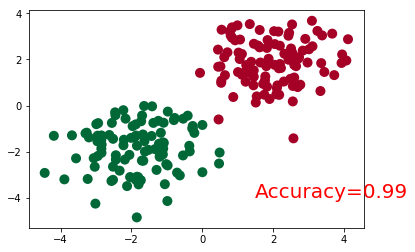

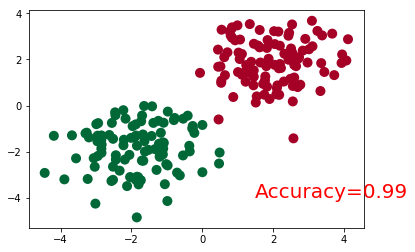

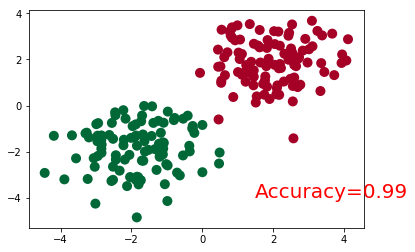

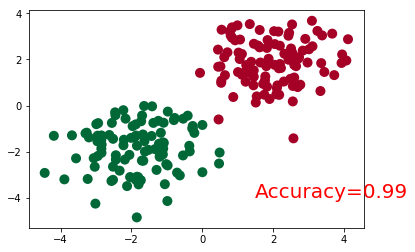

In [16]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.02)
loss_func = torch.nn.CrossEntropyLoss()

for t in range(100):
    output = net(x)
    loss = loss_func(output, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if(t % 10 == 0 or t in [3, 6]):
        plt.cla()
        _, prediction = torch.max(F.softmax(output, dim=1), 1)
        pred_y = prediction.data.numpy().squeeze()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = sum(pred_y == target_y) / 200.0
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color':  'red'})
        plt.show()
        plt.pause(0.1)
        
plt.ioff()